# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In this notebook, a dataset of human body temperatures is analyzed. This exercise employs the concepts of hypothesis testing, confidence intervals and statistical significance.


#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# import libraries and read in the csv file for human body temperature

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<p> The dataset has three variables for every record: the person's temperature, gender, and heart rate. The pertinent variable for this notebook will mainly be the temperature, although the gender column will also be analyzed.

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## Is the distribution of body temperatures normal?

<p> Although this is not a requirement for CLT to hold , it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

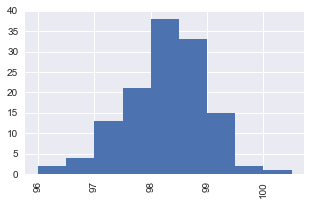

In [4]:
sns.set()
plt.figure(figsize=(5,3))
bin_edges = np.arange(96, 101, step = 0.5)
plt.hist(df['temperature'], bins=bin_edges)
plt.xticks(rotation=90)
plt.show()

<p> An initial impression is that this distribution looks roughly normal. However, scipy's stats.normaltest will be used to confirm the normality of the distribution.

In [5]:
k2, p = stats.normaltest(df['temperature'])
print(k2, p)

2.70380143332 0.258747986349


<p> Typically, a p-value less than 0.05 indicates that a distribution is very unlikely to be normal. Because the p-value is much greater than 0.05, this distribution is likely normal.

## Is the sample size large? Are the observations independent?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


<p> There are a total of 130 observations in this DataFrame. A sample with more than 30 observations is generally considered large, so this is a large sample. The observations in the sample are measurements from different people and are independent.

## Is the true population mean really 98.6 degrees F?

<ul>
<li>Would you use a one-sample or two-sample test? Why?
<li>In this situation, is it appropriate to use the  t  or  z  statistic?
</ul>

In [7]:
# write a function which performs a one-sample z-test

def z_test(sample, pop_mean):
    """Computes the z-statistic for a sample, and the p-value"""    
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    samplesize_sqrt = np.sqrt(len(sample))
    
    z_stat = (sample_mean - pop_mean) / (sample_std / samplesize_sqrt)
    p_value = stats.norm.cdf(z_stat) * 2
    
    return z_stat, p_value


# perform z-test on the sample
z, p = (z_test(df['temperature'], 98.6))
print('z-statistic: ', z) 
print('p-value: ', p)

z-statistic:  -5.47592520208
p-value:  4.35231516588e-08


<p> A one-sample test is used as we are testing the mean human temperature from a sample group against the mean temperature of the population. As the sample size is over 30 observations, a z-test is performed. The p-value is computed as well. 

The probability of obtaining a z-value of -5.47 is 4.35$^{-08}$, making it highly unlikely that the population mean is really 98.6$^{\circ}$F. Therefore, we can reject the null hypothesis that the sample is derived from a population where the mean temperature is 98.6$^{\circ}$F.


#### Now try using the other test. How is the result be different? Why?

In [8]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The t-test results in a t-statistic of -5.45 and a small p-value of 2.41$^{-07}$, which also indicates that it is highly unlikely that this sample is derived from a population with a mean temperature of 98.6$^{\circ}$F. 

## Draw a small sample of size 10 from the data and repeat both tests.

<ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [9]:
small_sample = np.random.choice(df['temperature'], 10)

z2, p2 = (z_test(small_sample, 98.6))
print('z-statistic: ', z2) 
print('p-value: ', p2)


z-statistic:  -3.39751176191
p-value:  0.000680016646471


<p> For such a small sample size, a t-test should be used whether or not the population's standard deviation is known. The z-statistic once again suggests that it is highly unlikely that the sample came from a population with a mean temperature of 98.6$^{\circ}$F.

In [10]:
# perform a t-test on the small sample

stats.ttest_1samp(small_sample, 98.6)


Ttest_1sampResult(statistic=-3.2231626634580119, pvalue=0.01043635519175537)

The t-test results in a t-statistic with a smaller absolute value and a larger p-value, but it is still highly unlikely that that the sample came from a population with a  mean temperature of 98.6$^{\circ}$F. Using this smaller sample, we would still reject the null hypothesis that the mean temperature of the population is 98.6$^{\circ}$F.

## At what temperature should we consider someone's temperature to be "abnormal"?

<ul>
    <li> Start by computing the margin of error and confidence interval.
</ul>

In [11]:
# write a function to determine margin of error

def margin_of_error(sample):
    """Determines the margin of error for a 95% confidence interval."""
    sample_std = np.std(sample)
    samplesize_sqrt = np.sqrt(len(sample))
    moe = 1.96 * (sample_std/samplesize_sqrt)
    return moe


sample_moe = margin_of_error(df['temperature'])

# to calculate the confidence interval, we add and subtract the margin of error to the sample mean

confidence_interval = [np.mean(df['temperature']) - sample_moe, np.mean(df['temperature']) + sample_moe]

print(confidence_interval)

[98.123679804428193, 98.374781734033363]


A 95% confidence interval for the sample includes temperatures between 98.12$^{\circ}$F to 98.37$^{\circ}$F. This means that a temperature of 98.6$^{\circ}$F would actually be abnormal.

## Is there a significant difference between males and females in normal temperature?

<ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
</ul>

In [19]:
# create 2 different dataframes, one for males and one for females
df_female = df[df.gender == 'F']
df_male = df[df.gender == 'M']

# define a function for a two-sample test for equal means

def two_z_test(sample1, sample2):
    """Performs a two-sample z-test for the hypothesis that the means are equal"""
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1)
    std2 = np.std(sample2)
    size1 = len(sample1)
    size2 = len(sample2)
    z_stat = (mean1 - mean2) / np.sqrt(std1**2/size1 + std2**2/size2)
    return z_stat

# perform two-sample z-test on the samples

z2 = two_z_test(df_female['temperature'], df_male['temperature'])

print('z-statistic: ', z2)

z-statistic:  2.30322028919


<p> Here, a two-sample test is used as we are testing the means of two different populations against each other. The null hypothesis is that the two means are equal. 

The resulting z-statistic is 2.30. For ${\alpha}$ = .05, the critical values are -1.96 and 1.96. Because the z-statistic is larger than 1.96, it indicates that there is actually a significant difference between the mean temperatures for the two populations, and the null hypothesis can be rejected.

In [14]:
# use a t-test to test the means of the two populations

stats.ttest_ind(df_female['temperature'],df_male['temperature'])

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

As the t-statistic is 2.29 and the p-value is 0.02, the null hypothesis can also be rejected if a t-test is used.

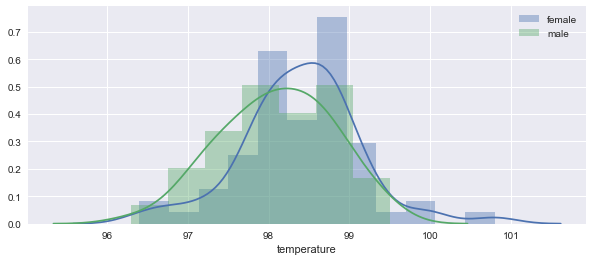

In [13]:
plt.figure(figsize=(10,4))
sns.distplot(df_female['temperature'], label='female')
sns.distplot(df_male['temperature'], label='male')
plt.legend()
plt.show()

The mean female temperature appears to be higher than the mean male temperature.

## Conclusion

The mean normal body temperature has been held to be 37$^{\circ}$C or 98.6$^{\circ}$F since 1868. In this notebook, we examined the validity of this claim by testing the mean of a sample population of 130 people against the stated population mean of 98$^{\circ}$F. 

The null hypothesis is that the sample is pulled from a population with a mean temperature of 98.6$^{\circ}$F. The mean temperature of the sample is 98.25$^{\circ}$F, but we use a z-test to see how likely it is that this sample is pulled from a population with a mean temperature of 98.6$^{\circ}$F. The resulting z-statistic is -5.476 and the p-value:  4.35$^{-08}$, meaning that the sample mean is very, very far from the population mean and we can reject the null hypothesis.

Finally, we test the mean temperatures of males against the mean temperatures of females using a two-sample test. This test shows that there is a significant difference between the temperatures of men and women, and that they are unlikely to be from a population where men and women have the same mean body temperature.